In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# WHO data

In [ ]:
# getting date
df = pd.read_csv('data/2019-nCov stats - International.csv', ).set_index('time')\
    .drop(['Hongkong','Macao','Taiwan','Diamond Princess'])\
    .T.dropna(how='all')\
    .drop('Alert Level')

for i, v in enumerate([63,68,75,100,124,158,221,319,435,541,704,994,1301,1630,2183,2770,
                       3613,4596,6344,9197,13779,19367,24192,33592,43781,54856,68211,85435,104126,123578,143491,163788,188530,
                      215003,244877,277161,311357,336673,367004,402992,434927]):
    i_ = df.index[39+i]
    df.at[i_, 'US'] = v
    
df.at['3-16','Iran']=13938

df.to_csv('data/2019-nCov stats - International_corrected.csv')

focus = df.copy()
for i in list(focus):
    focus[i] = focus[i] - focus[i].shift(1)
focus.to_csv('data/Intl for color tab.csv')

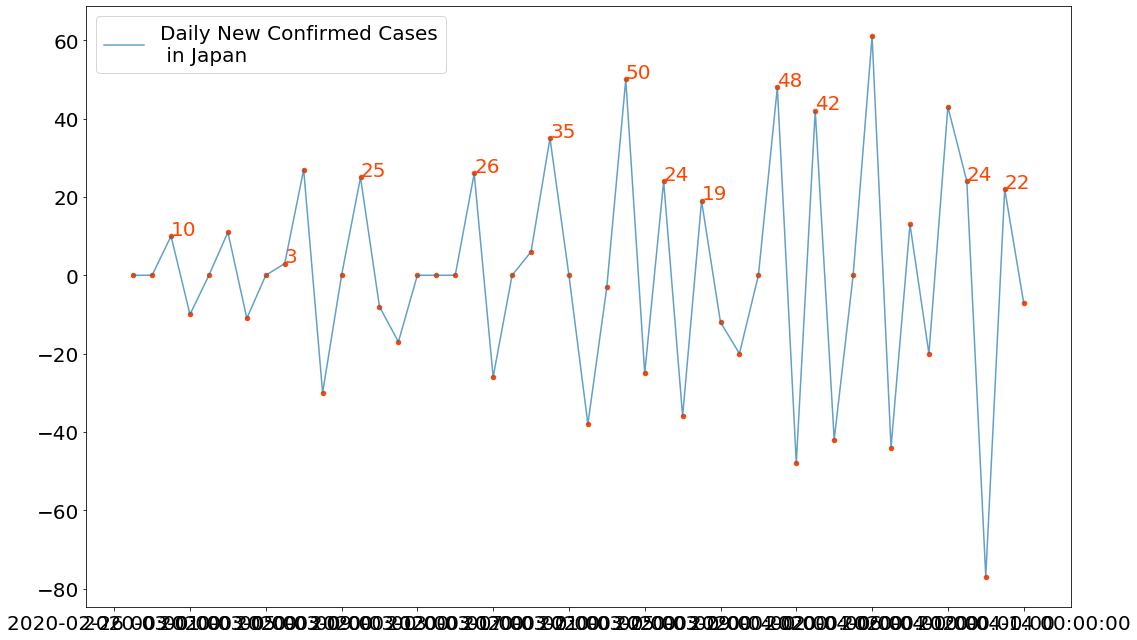

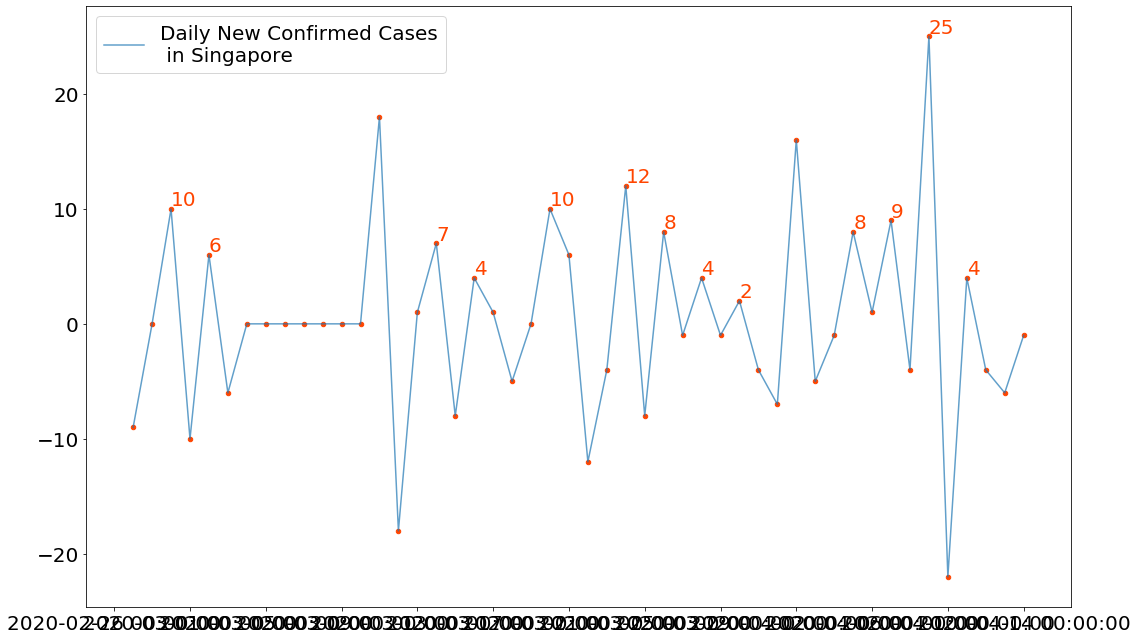

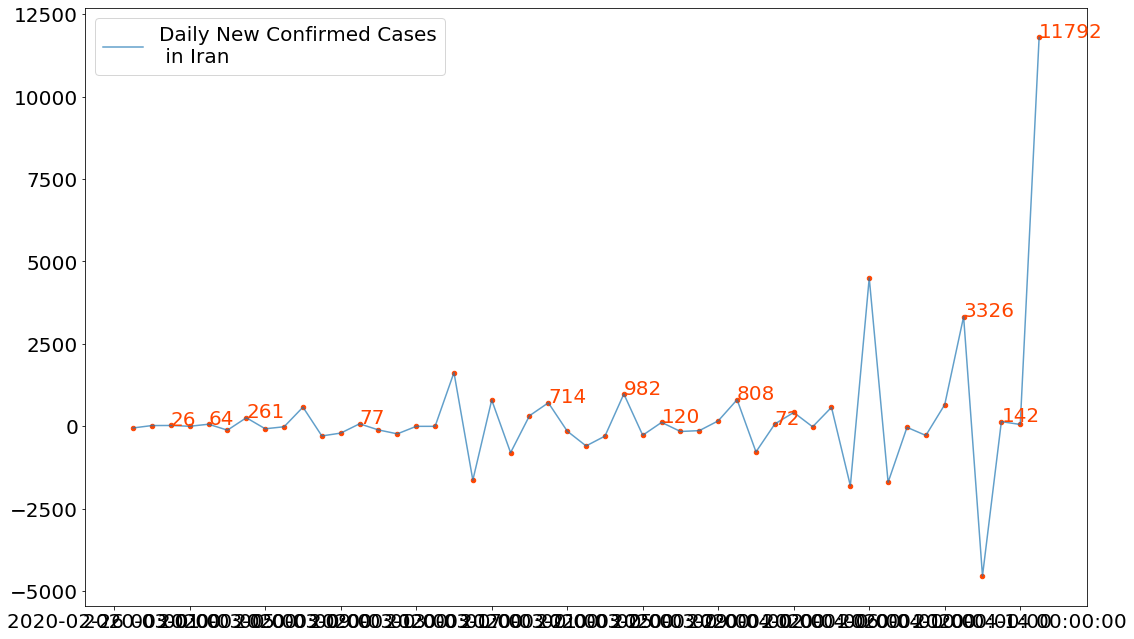

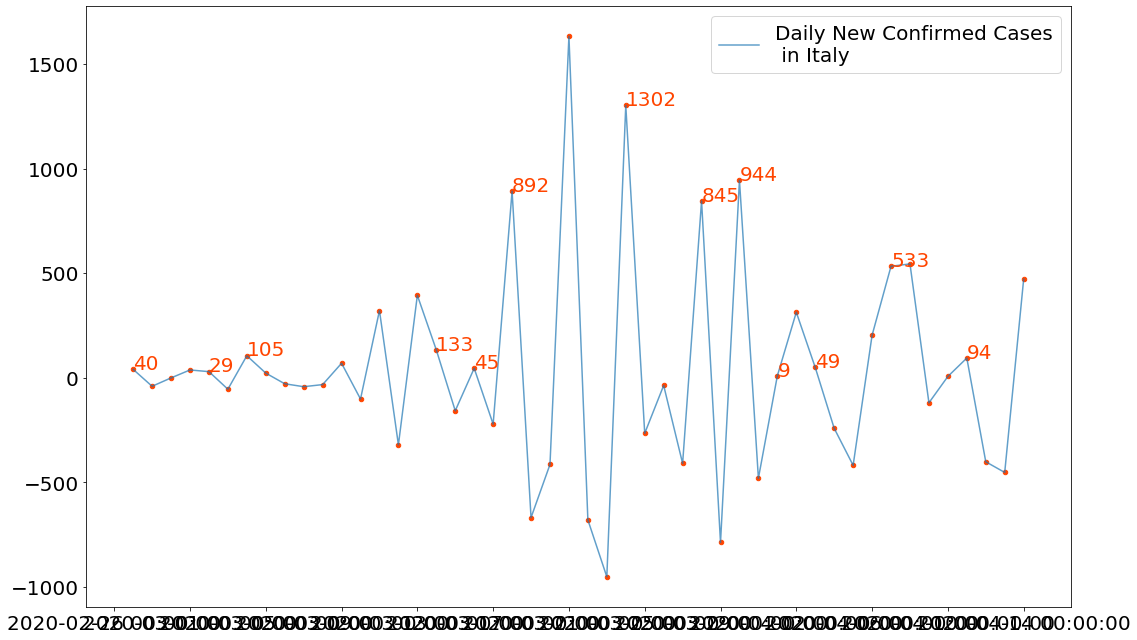

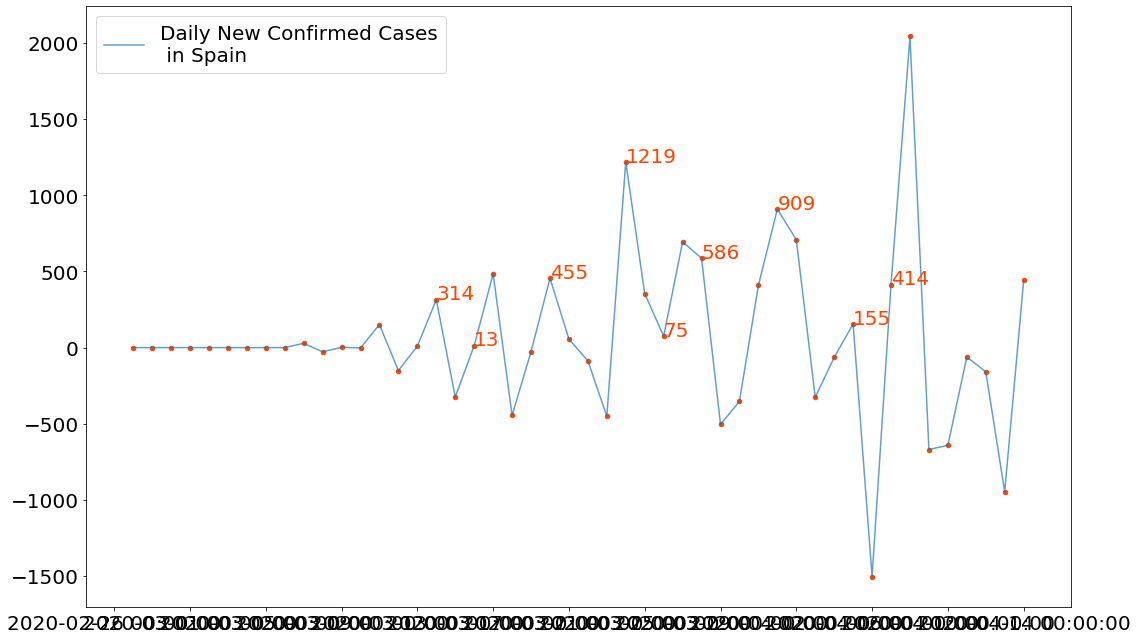

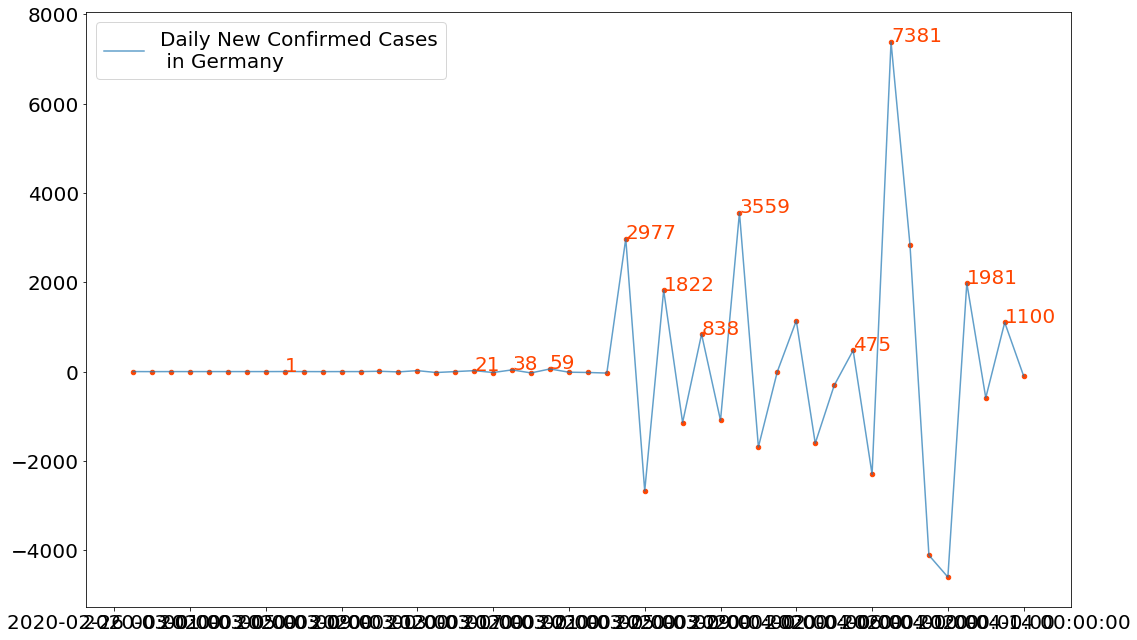

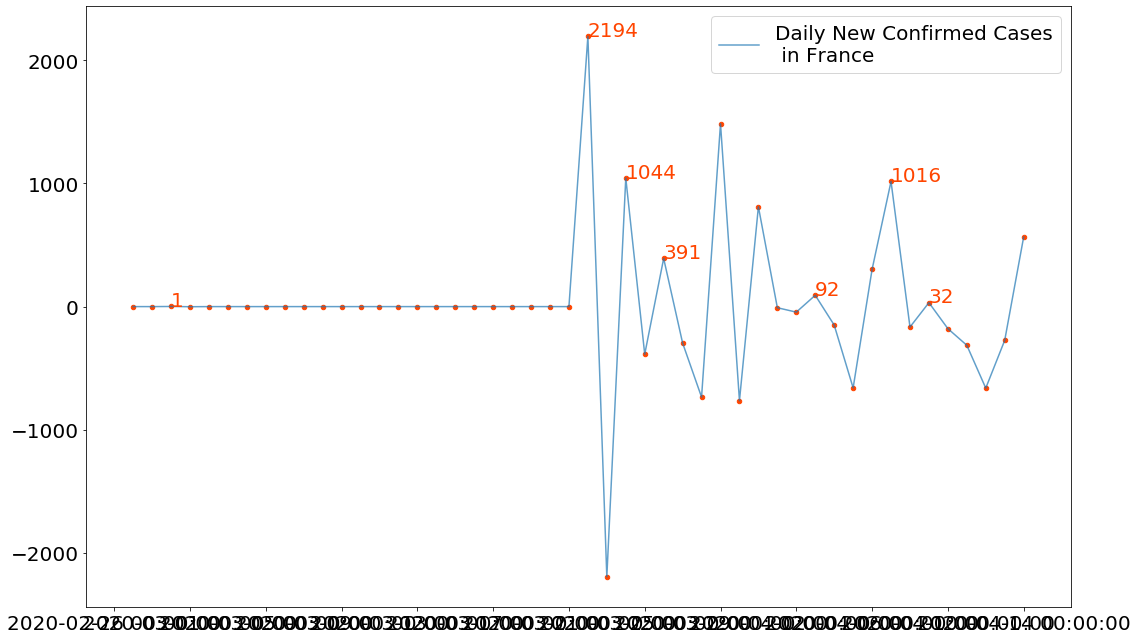

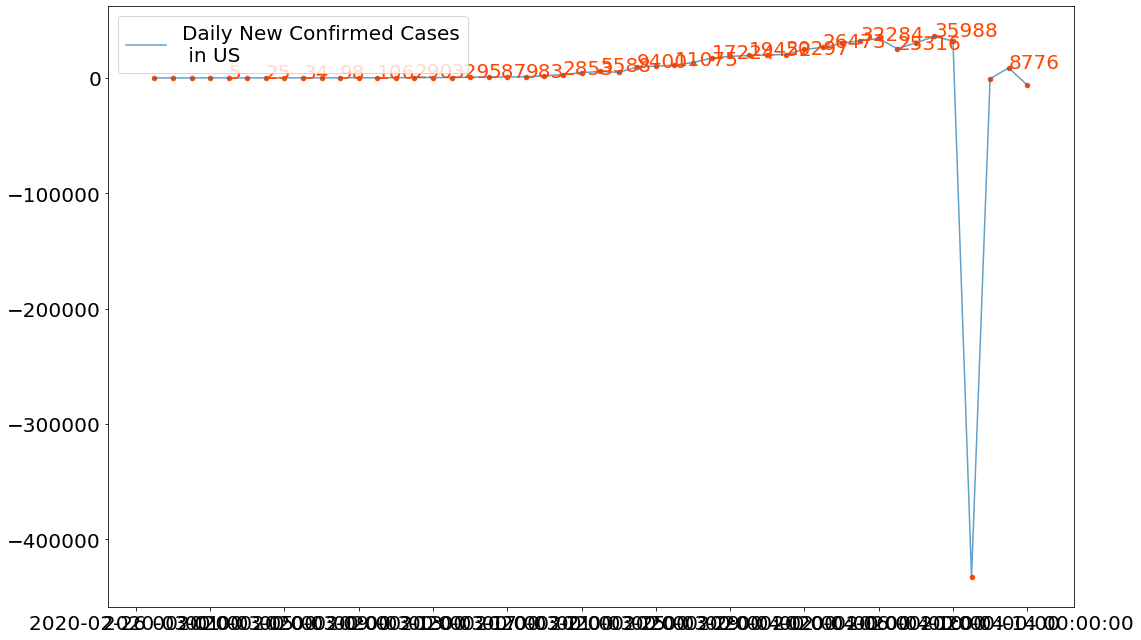

In [4]:
df = pd.read_csv('data/2019-nCov stats - International_corrected.csv').set_index('Unnamed: 0')

offset = 35
for country in 'Japan_Singapore_Iran_Italy_Spain_Germany_France_US'.split('_'):
    focus =  df.loc[:,[country]].copy()[offset:]
    focus['new'] = focus[country] - focus[country].shift(1)

    fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
    ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in ' + country, alpha=0.7)
    ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')

    for i, v in enumerate(focus.new):
        if v > 0 and (i%2) != (len(focus.index)%2):
            ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=20)

    # ax.set_yscale('log')
    ax.tick_params(labelsize=20)
    ax.legend(fontsize=20)

    plt.tight_layout()
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))
    plt.show()

In [ ]:
country = 'US' 

focus =  df.loc[:,[country]].copy()[offset:]
focus['new'] = focus[country] - focus[country].shift(1)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in ' + country, alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')

for i, v in enumerate(focus.new):
    if v > 0 and v not in [5974,4050,5210,4668,3590,6549]:
        ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=20)

# ax.set_yscale('log')
ax.tick_params(labelsize=20)
ax.legend(loc="upper left", fontsize=30)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))

# plt.savefig(r'figures/%s.png'% (country+date), dpi=600)